In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn import mixture
from scipy import sparse, stats

%matplotlib inline
sns.set(context='paper', style='ticks')

Dense array

In [2]:
M = np.random.rand(100,100)

Filter

In [3]:
M[M < 0.7] = 0

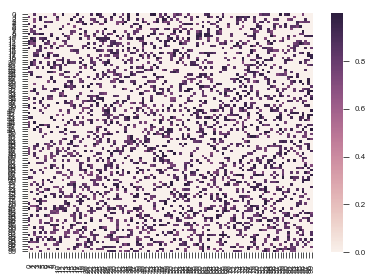

In [4]:
sns.heatmap(M)

Sparsify and extract discritized data (i.e. the coordinates of non-zero elements)

In [5]:
SM = sparse.csc_matrix(M)

In [6]:
x, y, _ = sparse.find(SM)

In [7]:
data = np.vstack((x,y)).T

Get clusters

In [8]:
def gmm(M, n):
    models = [None for i in range(n)]
    for i in range(n):
        models[i] = mixture.GaussianMixture(n_components=i+1, covariance_type='full', random_state=0).fit(M)
    BIC = [m.bic(M) for m in models]
    return models

In [9]:
models = gmm(data, 10)

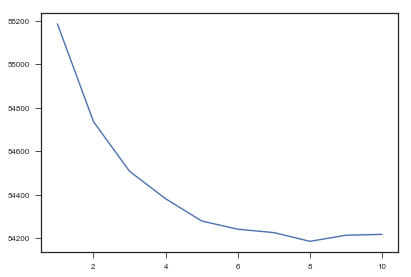

In [10]:
def plotBIC(data, models):
    BIC = [m.bic(data) for m in models]
    clusters = [m.n_components for m in models]
    plt.plot(clusters, BIC)
    
plotBIC(data, models)